In [1]:
import scipy.stats as st
import pandas as pd
import numpy as np

def find_quantile(level):
    geom_numbers = st.geom.rvs(0.1, size=10)

    s = pd.Series(geom_numbers)

    quan = s.quantile(level)
    print('Квантиль уровня ', level,':',  float('{:.3f}'.format(quan)))


In [49]:
import pylab
import random
import math 
import matplotlib
import numpy as np
import scipy.stats as sc
from scipy.stats import geom
import matplotlib.pyplot as plt
from random import randint

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
        
    l = 1
    print('Реализация выборки объема %d: '%m)
    print('')
    for k in A:
        print('%d): '%l, end='')
        print(*k)
        l += 1
    return A
def make_efr(M, n, quant = 0.1, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
                
                
                #-------------------------------------------------------------upper_limit
                final_sum += lst[index][1]
                #print(lst[index + 1])
                if lst[index ][0] <= f_x <= lst[index + 1][0]:
                    upper_list.append(final_sum)
                
                #-----------------------------------------------------------------------------
                    
                
              
                
                if f_x == -1:
                    
                    x0, y0 = [-2, lst[0][0]], [0,0]
                    x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                    x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

                    


                    plt.grid(True) #Сетка
                    plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

            if lst[len(lst) - 1][0] < f_x:
                    upper_list.append(1)
            #print(upper_list)
        
        if f_x == -1:
            plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
            x3, y3 =[lst[0][0] - 3, lst[len(lst) - 1][0] + 3],[quant, quant]# нахождение квантили
            plt.plot(x3,y3, color = 'k')
            pylab.legend ()
            #plt.show()

    return upper_list


from scipy.stats import geom
import matplotlib.pyplot as plt


def make_сdf(p):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
    
    pylab.figure (1)
    ax.plot(x, geom.cdf(x, p), 'bo', ms = 8, label = 'geom cdf')
    #ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

    rv = sc.geom(p)
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit_quant(M, n , f_x):
    lol = make_efr(M, n, f_x)
    lol.sort(reverse = True)
        
    print(lol)

    
    

In [56]:
M = make_vibor(5)

Реализация выборки объема 5: 

1): [8, 3, 4, 2, 2]
2): [5, 3, 24, 0, 3]
3): [16, 7, 17, 8, 0]
4): [15, 4, 2, 1, 7]
5): [4, 6, 16, 4, 30]


Квантиль уровня  0.1 : 1.9


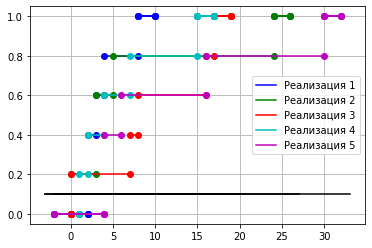

In [57]:
make_efr(M,5, 0.1)
find_quantile(0.1)

Квантиль уровня  0.5 : 7.0


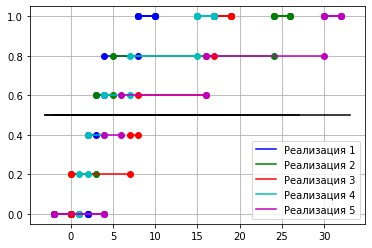

In [60]:
make_efr(M,5, 0.5)
find_quantile(0.5)

Квантиль уровня  0.7 : 7.6


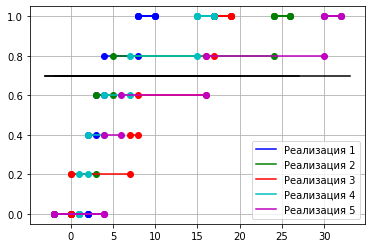

In [59]:
make_efr(M,5, 0.7)
find_quantile(0.7)